In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

df = pd.read_csv("C:\\Users\\borba\\Projetos\\EDA Spotify\\data\dataset.csv")

In [2]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [3]:
df.shape

(114000, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

## Visão Geral do Dataset

O dataset contém aproximadamente 114 mil faixas do Spotify, com 21 variáveis relacionadas
a características de áudio, popularidade e metadados das músicas.

Cada linha representa uma música, enquanto as colunas descrevem atributos como
danceability, energy, loudness, tempo e popularidade.

In [5]:
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

## Tipos de Variáveis

O dataset possui uma combinação de variáveis numéricas e categóricas.
Foram identificadas colunas do tipo float, int e object.

As variáveis numéricas representam características de áudio das músicas,
enquanto as variáveis categóricas incluem informações como nome da faixa,
artista e gênero musical.

In [6]:
df.isnull().sum().sort_values(ascending=False).head(10)

artists             1
album_name          1
track_name          1
Unnamed: 0          0
mode                0
time_signature      0
tempo               0
valence             0
liveness            0
instrumentalness    0
dtype: int64

## Análise NaN

O dataset apresenta pouquíssimos valores ausentes, concentrados apenas em colunas
textuais. Não há impacto relevante para a análise exploratória.

In [7]:
df = df.drop(columns=['Unnamed: 0'])

In [8]:
df = df.dropna(subset=['artists', 'album_name', 'track_name'])

In [9]:
df.shape

(113999, 20)

## Limpeza de Dados

Foram removidas colunas irrelevantes para a análise, como um índice gerado automaticamente.
Além disso, um pequeno número de registros com valores ausentes em colunas textuais foi removido,
não afetando significativamente o tamanho do dataset.

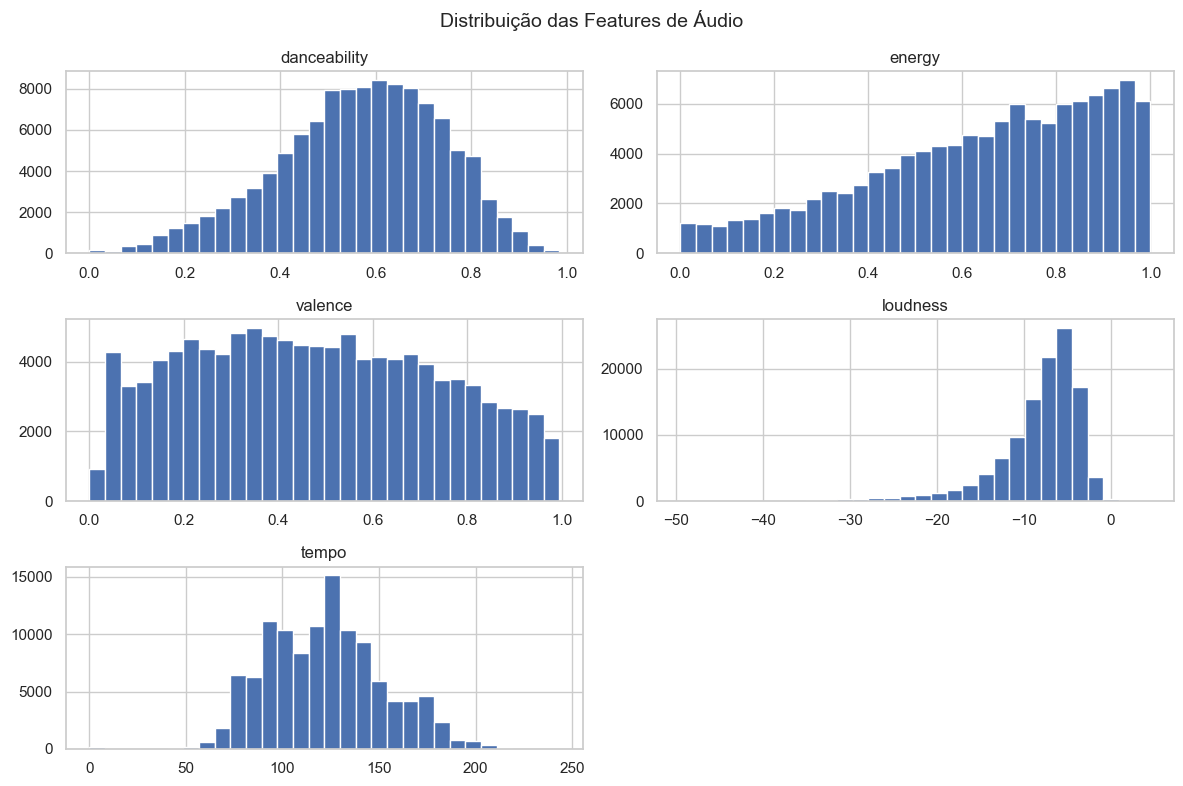

In [10]:
features = ['danceability', 'energy', 'valence', 'loudness', 'tempo']

df[features].hist(bins=30, figsize=(12,8))
plt.suptitle("Distribuição das Features de Áudio", fontsize=14)
plt.tight_layout()
plt.show()


## Análise Univariada – Features de Áudio - Histogramas

Danceability: Representa o quanto uma música é adequada para dançar com base em elementos rítmicos.


Energy: Representa a medida perceptiva de intensidade, atividade e "barulho" de uma faixa.


Valence: Representa a medida da positividade musical (músicas com alta valência soam mais felizes).


Loudness: Representa o volume médio da faixa em decibéis (dB) em toda a sua duração.


Tempo: Representa a velocidade estimada da música medida em batidas por minuto (BPM).

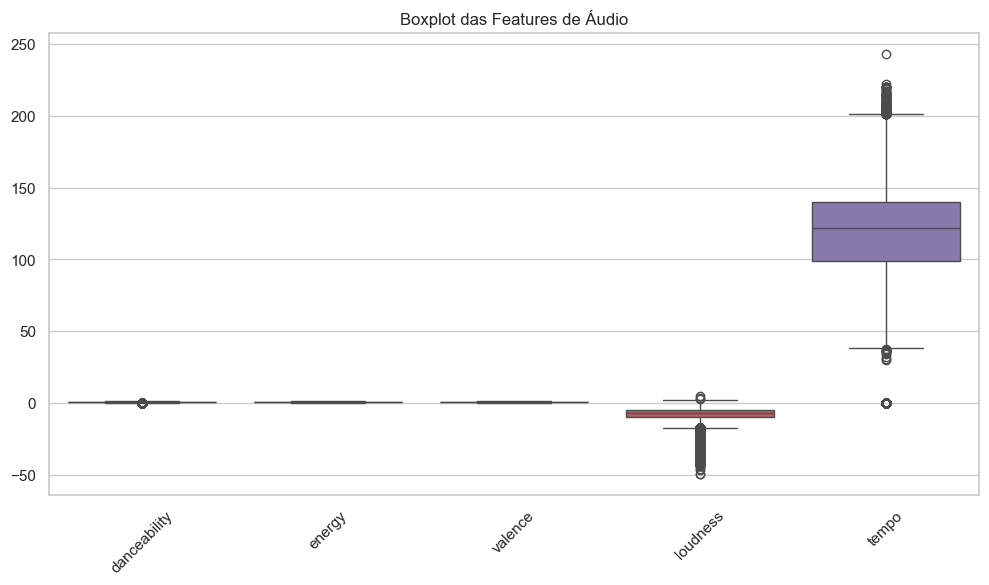

In [11]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[features])
plt.xticks(rotation=45)
plt.title("Boxplot das Features de Áudio")
plt.show()
##

## Boxplot das Features de Áudio

O destaque técnico vai para o Tempo, que é a métrica com maior diversidade de valores, e para o Loudness, que mostra uma tendência de volume padronizado com diversas exceções silenciosas.
Curiosidade: Tempo (BPM) é a variável com maior amplitude e valores absolutos, com a mediana situada em torno de 120 BPM e alcançando picos (outliers) acima de 200. A caixa roxa mostra que a maioria das músicas está entre 100 e 140 BPM.

In [12]:
genre_popularity = (
    df.groupby('track_genre')['popularity']
    .mean()
    .sort_values(ascending=False)
)


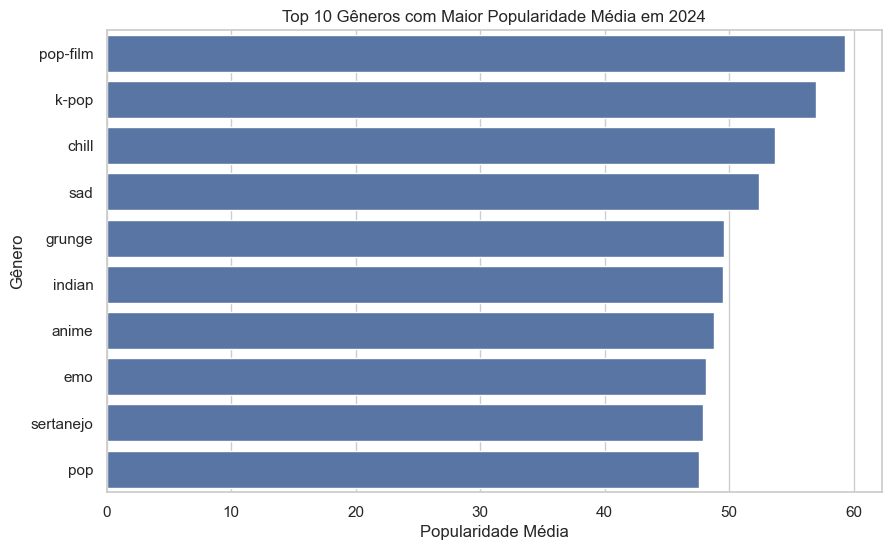

In [14]:
top_genres = genre_popularity.head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title("Top 10 Gêneros com Maior Popularidade Média em 2024")
plt.xlabel("Popularidade Média")
plt.ylabel("Gênero")
plt.show()


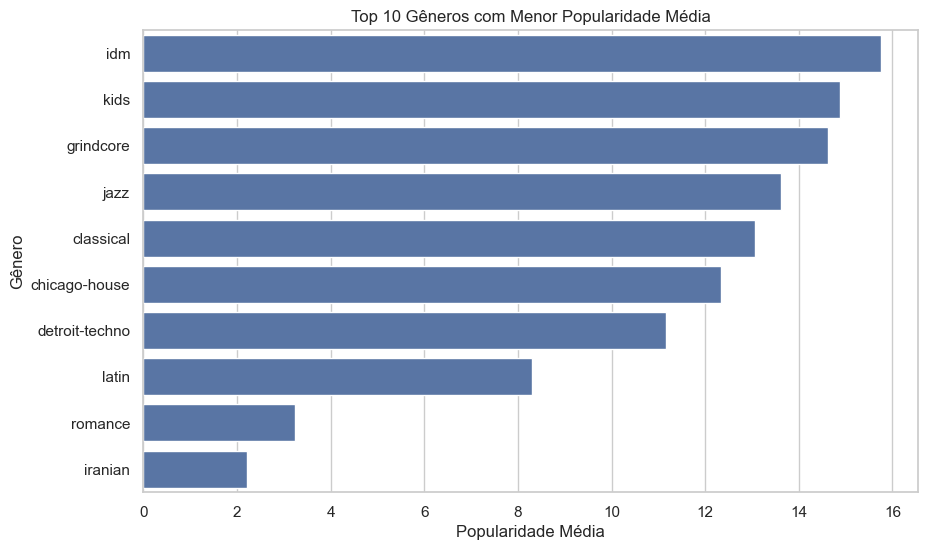

In [15]:
bottom_genres = genre_popularity.tail(10)

plt.figure(figsize=(10,6))
sns.barplot(x=bottom_genres.values, y=bottom_genres.index)
plt.title("Top 10 Gêneros com Menor Popularidade Média")
plt.xlabel("Popularidade Média")
plt.ylabel("Gênero")
plt.show()


## Análise Univariada – Popularidade por Gênero

A análise da popularidade média por gênero musical indica diferenças claras
entre estilos musicais.

Gêneros como "pop-film" e "k-pop" estão em alta. E gêneros como "iranian" e "romance" não são tão executados na plataforma, representando um nicho muito pequeno de ouvintes.

> Nota: A popularidade é uma métrica fornecida pelo Spotify e não representa
o número absoluto de reproduções, sendo utilizada aqui como proxy de audiência.


In [16]:
df['track_genre'].value_counts().head(20)


track_genre
acoustic             1000
afrobeat             1000
psych-rock           1000
progressive-house    1000
power-pop            1000
pop                  1000
pop-film             1000
piano                1000
party                1000
pagode               1000
opera                1000
new-age              1000
mpb                  1000
minimal-techno       1000
metalcore            1000
metal                1000
mandopop             1000
malay                1000
latino               1000
latin                1000
Name: count, dtype: int64

In [17]:
brazil_genres = [
    'mpb',
    'pagode',

]

df_br = df[df['track_genre'].isin(brazil_genres)]
df_br.shape


(2000, 20)

In [18]:
artist_popularity = (
    df_br.groupby('artists')['popularity']
    .mean()
    .sort_values(ascending=False)
)


In [19]:
artist_counts = df_br['artists'].value_counts()

valid_artists = artist_counts[artist_counts >= 5].index

artist_popularity = artist_popularity[artist_popularity.index.isin(valid_artists)]


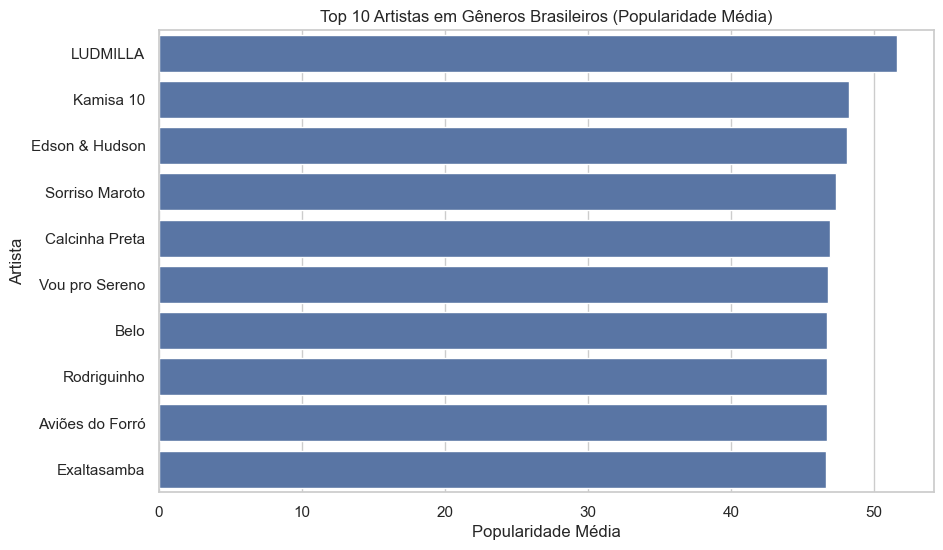

In [20]:
top_artists = artist_popularity.head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_artists.values, y=top_artists.index)
plt.title("Top 10 Artistas em Gêneros Brasileiros (Popularidade Média)")
plt.xlabel("Popularidade Média")
plt.ylabel("Artista")
plt.show()


## Artistas em Destaque em Gêneros Associados ao Brasil

Para chegar a esse resultado, comecei entendendo as limitações do conjunto de dados. O dataset do Spotify não possui informações sobre país nem número real de reproduções, apenas uma métrica de popularidade global. Por isso, não é possível afirmar diretamente qual artista é o mais ouvido no Brasil.

Diante disso, reformulei a pergunta e utilizei uma abordagem exploratória. Considerei apenas faixas pertencentes a gêneros musicais associados à música brasileira, como MPB, samba, pagode e sertanejo. Essa filtragem permitiu criar um recorte mais próximo do contexto brasileiro, mesmo sabendo que a métrica de popularidade continua sendo global.

Após esse recorte, agrupei os dados por artista e calculei a popularidade média de suas músicas. Para evitar distorções causadas por artistas com poucas faixas no dataset, considerei apenas aqueles com um número mínimo de músicas. Por fim, ordenei os artistas pela popularidade média e visualizei os mais bem posicionados em um gráfico, facilitando a interpretação dos resultados.

Essa análise não representa o número real de reproduções no Brasil, mas funciona como uma aproximação exploratória para identificar quais artistas se destacam dentro de gêneros associados à música brasileira, com base nos dados disponíveis.


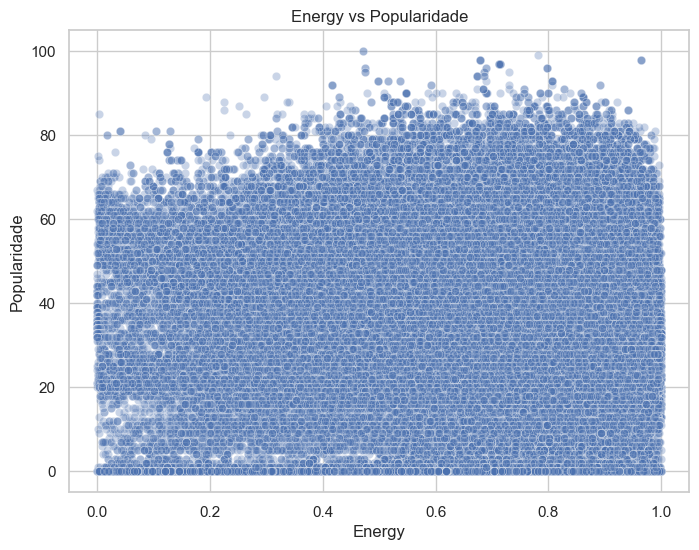

In [21]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='energy',
    y='popularity',
    alpha=0.3
)
plt.title("Energy vs Popularidade")
plt.xlabel("Energy")
plt.ylabel("Popularidade")
plt.show()


## Gráfico de Dispersão (ou Scatter Plot)

O gráfico de dispersão revela que não existe uma relação direta ou linear entre a energia de uma faixa e o seu sucesso comercial. Diferente do que se poderia imaginar, uma música não se torna automaticamente mais popular apenas por ser mais energética.


In [23]:
top_genres = df['track_genre'].value_counts().head(10).index
df_top = df[df['track_genre'].isin(top_genres)]


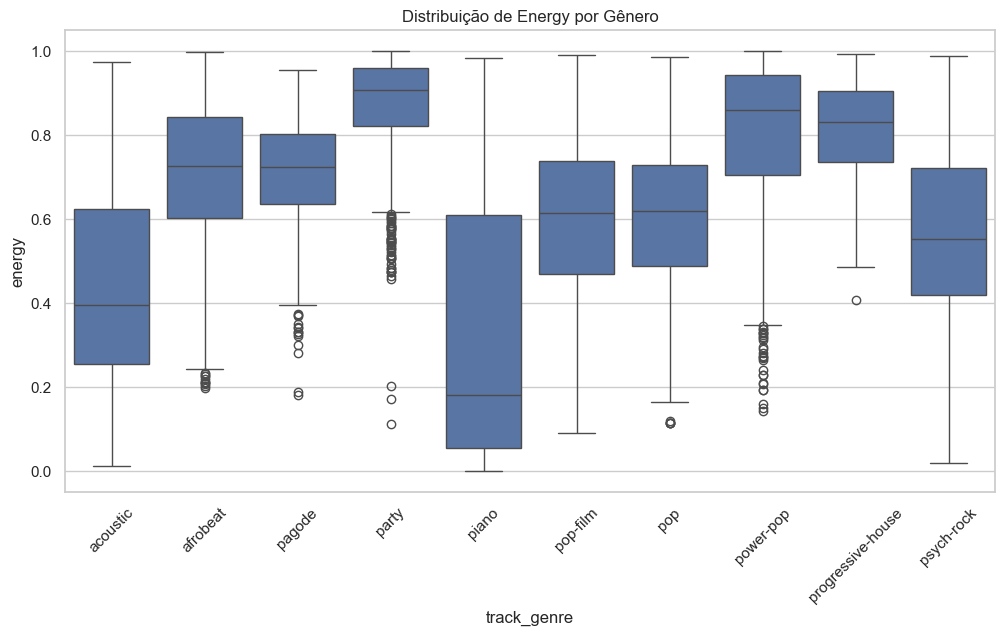

In [24]:
plt.figure(figsize=(12,6))
sns.boxplot(
    data=df_top,
    x='track_genre',
    y='energy'
)
plt.xticks(rotation=45)
plt.title("Distribuição de Energy por Gênero")
plt.show()


## Boxplot (ou Diagrama de Caixa)

Ao analisarmos a distribuição, percebemos que gêneros como party, progressive-house e power-pop dominam o topo da escala de energia.
Por outro lado, o gênero piano é o mais imprevisível do conjunto. Embora sua mediana seja baixa, a sua caixa é a mais alongada verticalmente, mostrando que a "energia" em peças de piano pode variar drasticamente — de músicas quase silenciosas a composições extremamente vigorosas. Já o acoustic e o psych-rock apresentam distribuições mais equilibradas e centralizadas, embora o rock psicodélico tenha uma tendência a subir mais na escala.
Por fim, é interessante notar a presença de muitos outliers (os pontos isolados) em gêneros como power-pop e party. Isso sugere que, embora a regra desses estilos seja a energia lá no alto, existem exceções — possivelmente baladas ou introduções mais lentas — que fogem completamente do comportamento padrão esperado para essas categorias

## Conclusões Finais

Nesta análise exploratória, foi investigado um conjunto de dados contendo mais de
114 mil faixas do Spotify, com características de áudio, popularidade e informações
categóricas como gênero musical e artista.

A análise univariada mostrou que a maioria das músicas apresenta valores intermediários
para características como danceability, energy e valence, enquanto variáveis como
loudness e tempo apresentam maior dispersão e presença de outliers, o que é esperado
em dados musicais reais.

Ao analisar a popularidade por gênero musical, observou-se que diferentes estilos
apresentam comportamentos distintos, tanto em termos de características sonoras
quanto de popularidade média, indicando padrões próprios de cada gênero.

Além disso, foi realizada uma análise específica considerando gêneros associados à
música brasileira, como MPB e pagode. A partir desse recorte, foi
possível identificar artistas que se destacam nesses estilos com base na popularidade
média de suas faixas. 

Na análise bivariada, as correlações entre características de áudio e popularidade
mostraram-se, em geral, fracas, sugerindo que o sucesso de uma música não depende
apenas de atributos sonoros, mas também de fatores externos como contexto cultural,
divulgação e tendências de mercado.

Por fim, este estudo reforça a importância da análise exploratória como etapa inicial
em projetos de ciência de dados, permitindo compreender o comportamento dos dados,
suas limitações e orientar decisões para análises mais avançadas no futuro.
